# Assignment 1 - Exercise Setup
This notebook contains the necessary code setup for the accompanying exercises. 

# 1. Coordinate Descent

In [41]:
import sympy as sp

# Define symbolic variables
x1, x2, x3 = sp.symbols('x1 x2 x3', real=True)

# Define the function
func = sp.exp(x1-3*x2+3) + sp.exp(3*x2-2*x3-2) + sp.exp(2*x3-x1+2)
def argmin_x1(x):
    df = sp.diff(func, x1)
    argmin = sp.solve(sp.Eq(df, 0), x1)[0]
    return float(argmin.subs(x))

def argmin_x2(x):
    df = sp.diff(func, x2)
    argmin = sp.solve(sp.Eq(df, 0), x2)[0]
    return float(argmin.subs(x))

def argmin_x3(x):
    df = sp.diff(func, x3)
    argmin = sp.solve(sp.Eq(df, 0), x3)[0]
    return float(argmin.subs(x))

def f(x):
    return float(func.subs(x))

def coordinate_descent(f, argmin, x0, max_iter=100, verbose=False):
    x = x0.copy()
    for i in range(max_iter):
        x[x1] = argmin[0](x)
        x[x2] = argmin[1](x)
        x[x3] = argmin[2](x)
        if verbose:
            print(f"iter {i+1:2d}: {tuple(x[s] for s in (x1,x2,x3))},  f = {f(x)}")
    return x, f(x)

x0 = {x1: 4, x2: 3, x3: 2}
print("argmin x1:", argmin_x1(x0))
print("argmin x2:", argmin_x2(x0))
print("argmin x3:", argmin_x3(x0))

x0 = {x1: 1, x2: 20, x3: 5}
print(x0)
argmins = [argmin_x1, argmin_x2, argmin_x3]
xf, fval = coordinate_descent(f, argmins, x0)
print("xf:", xf)
print("f(xf):", fval)

argmin x1: 6.0
argmin x2: 2.1666666666666665
argmin x3: 2.25
{x1: 1, x2: 20, x3: 5}
xf: {x1: 26.666666666666664, x2: 9.555555555555554, x3: 12.833333333333332}
f(xf): 8.154845485377136


# 2. Gradient Descent

In [42]:
import numpy as np
def f(u,v):
    return (u**2 + v - 11)**2 + (u + v**2 - 7)**2

def grad_f(u,v):
    #calculations on the paper
    df_du = 4*u*(u**2 + v - 11) + 2*(u + v**2 - 7)
    df_dv = 2*(u**2 + v - 11) + 4*v*(u + v**2 - 7)
    return np.array([df_du, df_dv])

def gradient_descent(f, grad_f, eta, u0, v0, max_iter=100) -> tuple[list, list]:
    path, values = [], []
    u, v = u0, v0
    for t in range(max_iter):
        # Store the current location and function value
        path.append((u, v))
        values.append(f(u, v))

        # GPT showed this as a way to put eta as a robust argument of a function or const 
        step = eta(t) if callable(eta) else eta

        # Take a step in the (negative) gradient direction
        du, dv = grad_f(u, v)
        u -= step * du
        v -= step * dv

    # Store the final final location
    path.append((u, v))
    values.append(f(u, v))
    return path, values

def eta_const(c=1e-3) -> float:
    return lambda t: c

def eta_sqrt(c=1e-3) -> float:
    return lambda t: c / np.sqrt(t + 1)

def eta_multistep(milestones=[30, 80, 100], c=1e-3, eta_init=1e-3) -> float:
    def schedule(t):
        k = sum(t >= m for m in milestones)
        return eta_init * (c ** k)
    return schedule

#Test constant step size
eta = eta_const(c=1e-3)
path, values = gradient_descent(f, grad_f, eta, 4, -5, max_iter=100)
print("Constant Step:")
print("f(u_100, v_100) =", values[-1])
print("min f(u_t, v_t) =", min(values))

#Test decreasing step size
eta = eta_sqrt(c=1e-3)
path, values = gradient_descent(f, grad_f, eta, 4, -5, max_iter=100)
print("\nSqrt Step:")
print("f(u_100, v_100) =", values[-1])
print("min f(u_t, v_t) =", min(values))

#Test multistep step size
eta = eta_multistep(milestones=[30, 80, 100], c=1e-1, eta_init=1e-3)
path, values = gradient_descent(f, grad_f, eta, 4, -5, max_iter=100)
print("\nMulti-step:")
print("f(u_100, v_100) =", values[-1])
print("min f(u_t, v_t) =", min(values))

#Test different starting points with constant step 
points = [(-4, 0), (0, 0), (4, 0), (0, 4), (5, 5)]
eta = eta_const(c=1e-3)
counter = 1
print("\nDifferent starting points (-4, 0), (0, 0), (4, 0), (0, 4), (5, 5) ")
for u0, v0 in points:
    path, values = gradient_descent(f, grad_f, eta, u0, v0, max_iter=100)
    u_100, v_100 = path[-1]
    f_final = values[-1]
    
    print(f"p{counter} ->  u: {u_100}   v: {v_100}   f_final: {f_final}")
    counter += 1

Constant Step:
f(u_100, v_100) = 0.028936222243675813
min f(u_t, v_t) = 0.028936222243675813

Sqrt Step:
f(u_100, v_100) = 12.868326735411497
min f(u_t, v_t) = 12.868326735411497

Multi-step:
f(u_100, v_100) = 2.3799544256175387
min f(u_t, v_t) = 2.3799544256175387

Different starting points (-4, 0), (0, 0), (4, 0), (0, 4), (5, 5) 
p1 ->  u: -3.1527685060505615   v: -0.7245791160351784   f_final: 95.87854333645393
p2 ->  u: 2.908593470343879   v: 2.0930548520121914   f_final: 0.2836291681954541
p3 ->  u: 3.450356945147482   v: -0.4816757965260163   f_final: 11.185850747696733
p4 ->  u: -2.367112070588055   v: 3.0999950650305585   f_final: 5.334202766920818
p5 ->  u: 2.9822282470041976   v: 2.0413763094200457   f_final: 0.026550944921419198


# 3. Polynomial Regression

In [43]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

# Load the dataset
housing = fetch_california_housing(as_frame=True)

# The data is in a pandas DataFrame
df = housing.frame

# View the first few rows
df.head()
# print(housing.DESCR)    # This was used to get the answers to 3a

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [44]:
# Splitting the dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error

# Let's separate features and target for clarity
features = df.drop(columns=["MedHouseVal"])
target = df["MedHouseVal"]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(scaled_features)

p = X_poly.shape[1]
print(p)

# Split the dataset (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(scaled_features, target, test_size=0.2, random_state=42)

feature_names = features.columns

lin = LinearRegression()
lin.fit(X_train, y_train)

y_pred_val_lin = lin.predict(X_val)
mse_val_lin    = mean_squared_error(y_val, y_pred_val_lin)

coef_lin = dict(zip(feature_names, lin.coef_))

beta_MedInc   = coef_lin['MedInc']
beta_AveBeds  = coef_lin['AveBedrms']
beta_HouseAge = coef_lin['HouseAge']

print("Linear:")
print("  β_MedInc =", beta_MedInc)
print("  β_AveBedrms =", beta_AveBeds)
print("  β_HouseAge =", beta_HouseAge)
print("  MSE_val =", mse_val_lin)

poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)      # fit only on training
X_val_poly   = poly.transform(X_val)            # transform val

poly_feature_names = poly.get_feature_names_out(feature_names)

lin_poly = LinearRegression()
lin_poly.fit(X_train_poly, y_train)

y_pred_val_poly = lin_poly.predict(X_val_poly)
mse_val_poly    = mean_squared_error(y_val, y_pred_val_poly)

coef_poly = dict(zip(poly_feature_names, lin_poly.coef_))

beta_MedInc                 = coef_poly['MedInc']
beta_MedInc_AveBedrms       = coef_poly['MedInc AveBedrms']
beta_HouseAge_AveBedrms     = coef_poly['HouseAge AveBedrms']

print("\nPolynomial degree-2:")
print("  β_MedInc =", beta_MedInc)
print("  β_MedInc·AveBedrms =", beta_MedInc_AveBedrms)
print("  β_HouseAge·AveBedrms =", beta_HouseAge_AveBedrms)
print("  MSE_val =", mse_val_poly)

ridge = Ridge(alpha=0.0005, fit_intercept=True)   # 0.001 / 2
ridge.fit(X_train_poly, y_train)

y_pred_val_ridge = ridge.predict(X_val_poly)
mse_val_ridge    = mean_squared_error(y_val, y_pred_val_ridge)

coef_ridge = dict(zip(poly.get_feature_names_out(features.columns),
                      ridge.coef_))

β_MedInc                 = coef_ridge['MedInc']
β_MedInc_AveBedrms       = coef_ridge['MedInc AveBedrms']
β_HouseAge_AveBedrms     = coef_ridge['HouseAge AveBedrms']

print("\nRidge-regularised degree-2 model:")
print("  β_MedInc = ", β_MedInc)
print("  β_MedInc·AveBedrms = ", β_MedInc_AveBedrms)
print("  β_HouseAge·AveBedrms = ", β_HouseAge_AveBedrms)
print("  MSE_val = ", mse_val_ridge)

44
Linear:
  β_MedInc = 0.8523816881485087
  β_AveBedrms = 0.37113188284861864
  β_HouseAge = 0.12238223843286633
  MSE_val = 0.5558915986952441

Polynomial degree-2:
  β_MedInc = 0.9345365368688503
  β_MedInc·AveBedrms = -0.13113158971575667
  β_HouseAge·AveBedrms = 0.05718585617099915
  MSE_val = 0.46430152383011447

Ridge-regularised degree-2 model:
  β_MedInc =  0.9345367791251732
  β_MedInc·AveBedrms =  -0.13113136818489687
  β_HouseAge·AveBedrms =  0.05718627043285876
  MSE_val =  0.46430056436420913


# 4. Bias and Variance
You can calculate the results manually, or use whatever code you would like.

# 5. Naive Bayes

In [45]:
from sklearn.datasets import fetch_20newsgroups
categories = ['sci.space', 'misc.forsale', 'comp.graphics', 'rec.sport.hockey']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

print(train.DESCR)

.. _20newsgroups_dataset:

The 20 newsgroups text dataset
------------------------------

The 20 newsgroups dataset comprises around 18000 newsgroups posts on
20 topics split in two subsets: one for training (or development)
and the other one for testing (or for performance evaluation). The split
between the train and test set is based upon a messages posted before
and after a specific date.

This module contains two loaders. The first one,
:func:`sklearn.datasets.fetch_20newsgroups`,
returns a list of the raw texts that can be fed to text feature
extractors such as :class:`~sklearn.feature_extraction.text.CountVectorizer`
with custom parameters so as to extract feature vectors.
The second one, :func:`sklearn.datasets.fetch_20newsgroups_vectorized`,
returns ready-to-use features, i.e., it is not necessary to use a feature
extractor.

**Data Set Characteristics:**

=================   ==========
Classes                     20
Samples total            18846
Dimensionality               1

The classes are indicated categorically with indices from zero to two by the target vector. The target names tell us which index belongs to which class.

In [46]:
y_train = train.target
y_train

array([3, 3, 1, ..., 2, 1, 0])

In [47]:
train.target_names

['comp.graphics', 'misc.forsale', 'rec.sport.hockey', 'sci.space']

We represent the documents in a bag of word format. That is, we create a data matrix ``D`` such that ``D[j,i]=1`` if the j-th document contains the i-th feature (word), and ``D[j,i]=0`` otherwise. 

In [48]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
vectorizer = CountVectorizer(stop_words="english", min_df=5,token_pattern="[^\W\d_]+", binary=True)
D = vectorizer.fit_transform(train.data)
D_test = vectorizer.transform(test.data)

We get the allocation of feature indices to words by the following array, containing the vocabulary.

In [49]:
vectorizer.get_feature_names_out()

array(['aa', 'aargh', 'ab', ..., 'zubov', 'zv', 'zyeh'], dtype=object)

For example, the word `zubov` has the index 7383.

In [50]:
np.where(vectorizer.get_feature_names_out() == 'zubov')[0]

array([7383])

$
p(y=c)=\frac{N_c}{N},
\qquad
p(x_i=1\mid y=c)=\frac{n_{ic}+\alpha}{N_c+2\alpha},
\qquad
p(y=c\mid x_i=1)=
\frac{p(x_i=1\mid y=c)\,p(y=c)}
{\sum_{c'} p(x_i=1\mid y=c')\,p(y=c')}
$

with $N$ documents in total, $N_c$ - in $c$, and $n_{ic}$ docs for class $c$ containing word $i$, and a very small $\alpha=10^{-5}$ for Laplace smoothing.


In [51]:
from collections import Counter

# we already have y-train
class_counts = Counter(y_train)          # N_c for every class c
N_total = len(y_train)              # total documents

priors = {c : class_counts[c] / N_total for c in sorted(class_counts)}
print("Class priors  p(y=c)")
for c, p in priors.items():
    print(f"  class {c:1d} ({train.target_names[c]}) : {p}")

Class priors  p(y=c)
  class 0 (comp.graphics) : 0.2472480948348857
  class 1 (misc.forsale) : 0.2476714648602879
  class 2 (rec.sport.hockey) : 0.2540220152413209
  class 3 (sci.space) : 0.2510584250635055


In [52]:
def log_conditional_prob(word, alpha=1e-5):
    """
    Uses Bernoulli counts and Laplace smoothing to return array log p(x_word = 1 | y = c) over all classes.
    """
    # Index of the word inside the vectorizer vocabulary
    try:
        idx = np.where(vectorizer.get_feature_names_out() == word)[0][0]
    except IndexError:
        raise ValueError(f"'{word}' is not in the vocabulary; try lowering "
                         "min_df or check spelling.")

    # Binary column for presence of that word in every training document
    word_presence = D[:, idx].toarray().ravel()   # shape (N_total, )

    # n_ic = number of docs of class c that contain the word 
    n_ic = np.bincount(y_train, weights=word_presence, minlength=len(priors))

    # N_c  = number of docs in class c (already in class_counts)
    N_c  = np.array([class_counts[c] for c in range(len(priors))])

    # Bernoulli + Laplace smoothing (alpha) 
    prob = (n_ic + alpha) / (N_c + 2 * alpha)     # p(x=1 | y=c)
    return np.log(prob) 

In [53]:
#5b
logp_chip = log_conditional_prob('chip')
print("log p(x_chip = 1 | y=c)  with Laplace alpha = 1e-5")
for c, lp in enumerate(logp_chip):
    print(f"  class {c} ({train.target_names[c]}) : {lp}")

log p(x_chip = 1 | y=c)  with Laplace alpha = 1e-5
  class 0 (comp.graphics) : -4.172675328628088
  class 1 (misc.forsale) : -4.0690257884263445
  class 2 (rec.sport.hockey) : -4.6051685526561466
  class 3 (sci.space) : -6.385184432774537


In [54]:
def posterior_given_word(word, alpha=1e-5):
    """
    Return array p(y=c | x_word = 1) over all classes.
    """
    log_p_x_given_y = log_conditional_prob(word, alpha)      # log p(x|y)
    p_x_given_y = np.exp(log_p_x_given_y)                # back to prob

    p_y = np.fromiter(priors.values(), dtype=float)          # p(y)
    numer = p_x_given_y * p_y                                # numerator
    denom = numer.sum()                                      # evidence
    return numer / denom      
#I used some help here

In [55]:
words = [
    (0, "electronics"),
    (1, "sale"),
    (2, "games"),
    (3, "ball")
]

print("Posterior p(y=c | x_word = 1)")
for c_target, word in words:
    post = posterior_given_word(word)
    print(f"\n'{word}' -> p(y={c_target} | x_{word}=1) = {post[c_target]}")
    
    #additional info
    for c, p in enumerate(post): print(f"   class {c}: {p:.4f}")

Posterior p(y=c | x_word = 1)

'electronics' -> p(y=0 | x_electronics=1) = 0.21052639885139895
   class 0: 0.2105
   class 1: 0.4737
   class 2: 0.0000
   class 3: 0.3158

'sale' -> p(y=1 | x_sale=1) = 0.9573332578609131
   class 0: 0.0027
   class 1: 0.9573
   class 2: 0.0160
   class 3: 0.0240

'games' -> p(y=2 | x_games=1) = 0.7029702075058984
   class 0: 0.0297
   class 1: 0.2475
   class 2: 0.7030
   class 3: 0.0198

'ball' -> p(y=3 | x_ball=1) = 0.4166661111104225
   class 0: 0.1667
   class 1: 0.0833
   class 2: 0.3333
   class 3: 0.4167


In [56]:
from sklearn.datasets import fetch_20newsgroups
categories = ['sci.space', 'misc.forsale', 'comp.graphics', 'rec.sport.hockey']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

print(train.DESCR)

.. _20newsgroups_dataset:

The 20 newsgroups text dataset
------------------------------

The 20 newsgroups dataset comprises around 18000 newsgroups posts on
20 topics split in two subsets: one for training (or development)
and the other one for testing (or for performance evaluation). The split
between the train and test set is based upon a messages posted before
and after a specific date.

This module contains two loaders. The first one,
:func:`sklearn.datasets.fetch_20newsgroups`,
returns a list of the raw texts that can be fed to text feature
extractors such as :class:`~sklearn.feature_extraction.text.CountVectorizer`
with custom parameters so as to extract feature vectors.
The second one, :func:`sklearn.datasets.fetch_20newsgroups_vectorized`,
returns ready-to-use features, i.e., it is not necessary to use a feature
extractor.

**Data Set Characteristics:**

=================   ==========
Classes                     20
Samples total            18846
Dimensionality               1

# 6. Decision Trees

In [57]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

iris = load_iris()
X = iris.data
y = iris.target
df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = y

def entropy(L):
    total = np.sum(L)
    p = L / total
    return -np.sum([i * np.log(i) for i in p])

root_counts = df['target'].value_counts().sort_index().values
E_root = entropy(root_counts)

mean_sepal_width = df['sepal width (cm)'].mean()

left_node = df[df['sepal width (cm)'] <= mean_sepal_width]
right_node = df[df['sepal width (cm)'] > mean_sepal_width]

left_counts = left_node['target'].value_counts().sort_index().reindex([0, 1, 2], fill_value=0).values
right_counts = right_node['target'].value_counts().sort_index().reindex([0, 1, 2], fill_value=0).values

E_left = entropy(left_counts)
E_right = entropy(right_counts)

n = len(df)
n_left = len(left_node)
n_right = len(right_node)

IG = E_root - (n_left / n) * E_left - (n_right / n) * E_right

print(f"Entropy (Root): {E_root:.4f}")
print(f"Entropy (Left): {E_left:.4f}")
print(f"Entropy (Right): {E_right:.4f}")
print(f"Information Gain: {IG:.4f}")


print(df)
print(iris.DESCR)


Entropy (Root): 1.0986
Entropy (Left): 0.9369
Entropy (Right): 0.8945
Information Gain: 0.1807
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149           

# 7. Support Vector Machines

accuracy = 0.9907407407407407
122
# support vectors = 62


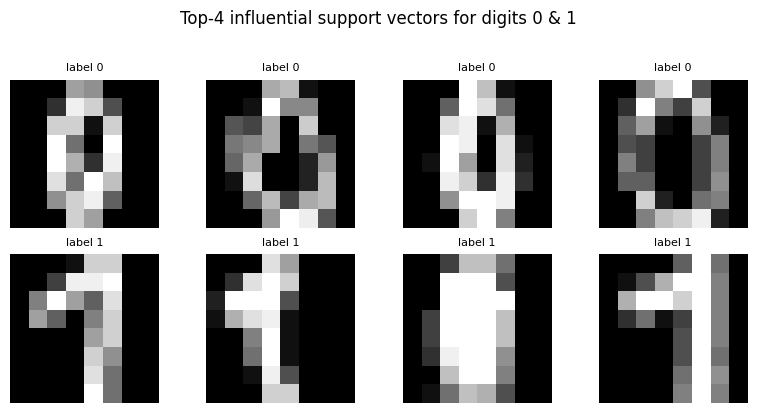

In [58]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Set random seed for reproducibility
seed = 42
np.random.seed(seed)

# Load digits dataset
digits = datasets.load_digits()
X, y = digits.data, digits.target

# Train-test split (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)
# print(digits.DESCR)

clf = SVC(kernel='rbf', gamma=0.0012, C=0.85)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("accuracy =", acc)

# labels of the support vectors
sv_labels = y_train[clf.support_]

# mask for digits 0 or 1
mask_01 = np.isin(sv_labels, [0, 1])

n_v = mask_01.sum()
print(n_v)

# The following code is for 7d
pair_row = 0 # the first row ((0,1) in our case) compares class 0 with class 1
pair_coefs = clf.dual_coef_[pair_row]   # values for every global SV
sv_indices = clf.support_ # map every global support-vector index back to its original sample
sv_labels  = y_train[sv_indices] # and label

mask_01 = (np.abs(pair_coefs) > 0) & np.isin(sv_labels, [0, 1]) # Create a mask, that keeps 
# non-zero a AND are labeled 0 or 1

indices_01   = sv_indices[mask_01]       # positions inside X_trains

print(f"# support vectors = {len(indices_01)}")

alphas_01 = pair_coefs[mask_01]
labels_01 = sv_labels[mask_01]
influence = np.abs(alphas_01)
top_indices = []
for digit in (0, 1):
    m       = labels_01 == digit
    idx     = indices_01[m]
    infl    = influence[m]
    order   = np.argsort(-infl)[:4]
    top_indices.extend(idx[order])

fig, axes = plt.subplots(2, 4, figsize=(8, 4))
fig.suptitle("Top-4 influential support vectors for digits 0 & 1", y=1.02)

for k, idx in enumerate(top_indices):
    ax = axes.flat[k]
    ax.imshow(X_train[idx].reshape(8, 8), cmap='gray', interpolation='nearest')
    ax.set_title(f"label {y_train[idx]}", fontsize=8)
    ax.axis('off')

plt.tight_layout()

In [59]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# full digits set
X, y = datasets.load_digits(return_X_y=True)

# candidate grid
param_grid = {
    "gamma": [0.0001, 0.0006, 0.001, 0.006],
    "C":     [0.6,    0.8,    1,     2, 3, 4, 6]
}

svc = SVC(kernel="rbf")
cv  = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid = GridSearchCV(svc, param_grid,
                    scoring="accuracy",
                    cv=cv,          # 5-fold CV
                    n_jobs=1)       # safe for any environment
grid.fit(X, y)

best_gamma = grid.best_params_["gamma"]
best_C     = grid.best_params_["C"]
best_mean  = grid.best_score_

print(best_gamma, best_C, best_mean)

0.001 1 0.9927638502011762
